In [1]:
from importlib import reload
import pandas as pd

In [2]:
import numpy as np
import spacy
from wordcloud import WordCloud


import matplotlib.pyplot as plt

In [3]:
import nltk
#nltk.download('stopwords')

In [4]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer


In [5]:
import sklearn.feature_extraction.text as text

In [6]:
import nlp_pandas_functions as npf
#dir(npf)

2022-01-24 19:28:26,783 loading file /home/cdsw/.flair/models/sentiment-en-mix-distillbert_4.pt


In [7]:
#pip3 install pyarrow
#pip3 install spacy
#pip3 install wordcloud
#pip3 install nltk
#pip3 install sklearn
#pip3 install ipdb

In [8]:
str_state = 'GA'
file = 'agent_comments_sales_'+str_state
#file = 'agent_comments_testdf'
#READ THE SALES DATA - STATE
df_sales = pd.read_feather(file + '_withsentiment.fea')
#df_sales = pd.read_feather(file+'_processed.fea')


In [9]:
df_sales_save = df_sales

In [10]:
df_sales = df_sales_save#.head(100000)

In [11]:
df_sales

,index,listingid,asgpropid,qtr,tax_year,cbsa_div,cbsa,state,Transdate,Transprice,...,clean_publicremarks_additional_words_textblobpolarity,clean_publicremarks_nopunct_textblobpolarity,clean_publicremarks_stemmed_textblobpolarity,clean_publicremarks_lemmatized_textblobpolarity,publicremarks_vaderpolarity,clean_publicremarks_vaderpolarity,clean_publicremarks_additional_words_vaderpolarity,clean_publicremarks_nopunct_vaderpolarity,clean_publicremarks_stemmed_vaderpolarity,clean_publicremarks_lemmatized_vaderpolarity
0,128,226661582,27649366.0,202008,2020.0,23580,23580,GA,20200811,359000.0,...,"[0.21512445887445886, 0.4510822510822511]","[0.22984126984126985, 0.4241269841269841]","[0.037373737373737365, 0.2111111111111111]","[0.22984126984126985, 0.4241269841269841]","{'compound': 0.9627, 'neg': 0.0, 'neu': 0.86, ...","{'compound': 0.9627, 'neg': 0.0, 'neu': 0.781,...","{'compound': 0.9401, 'neg': 0.0, 'neu': 0.803,...","{'compound': 0.9578, 'neg': 0.0, 'neu': 0.786,...","{'compound': 0.6486, 'neg': 0.0, 'neu': 0.936,...","{'compound': 0.9578, 'neg': 0.0, 'neu': 0.786,..."
1,190,226786904,27628370.0,202008,2020.0,29300,29300,GA,20200925,265000.0,...,"[0.27005602240896354, 0.5574649859943976]","[0.22595708639186904, 0.4931109228935316]","[0.31848484848484854, 0.5104433221099888]","[0.25494259363824584, 0.5119515026036765]","{'compound': 0.9939, 'neg': 0.015, 'neu': 0.70...","{'compound': 0.9898, 'neg': 0.013, 'neu': 0.70...","{'compound': 0.9876, 'neg': 0.015, 'neu': 0.70...","{'compound': 0.9889, 'neg': 0.014, 'neu': 0.69...","{'compound': 0.9732, 'neg': 0.0, 'neu': 0.801,...","{'compound': 0.9875, 'neg': 0.014, 'neu': 0.70..."
2,232,226142320,27963359.0,202005,2020.0,27600,27600,GA,20200624,239900.0,...,"[0.13000000000000003, 0.43]","[0.10000000000000002, 0.35833333333333334]","[0.20000000000000004, 0.45]","[0.10000000000000002, 0.35833333333333334]","{'compound': 0.8528, 'neg': 0.0, 'neu': 0.893,...","{'compound': 0.8221, 'neg': 0.0, 'neu': 0.853,...","{'compound': 0.8221, 'neg': 0.0, 'neu': 0.851,...","{'compound': 0.8074, 'neg': 0.0, 'neu': 0.858,...","{'compound': 0.3182, 'neg': 0.0, 'neu': 0.958,...","{'compound': 0.8074, 'neg': 0.0, 'neu': 0.858,..."
3,308,226738459,27516267.0,202008,2020.0,29300,29300,GA,20200713,130900.0,...,"[0.0, 0.0]","[0.13636363636363635, 0.45454545454545453]","[0.13636363636363635, 0.45454545454545453]","[0.13636363636363635, 0.45454545454545453]","{'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos...","{'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos...","{'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos...","{'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos...","{'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos...","{'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos..."
4,467,226850183,27791872.0,202008,2020.0,23580,23580,GA,20200702,406000.0,...,"[0.21875000000000006, 0.3675]","[0.18444444444444447, 0.32666666666666666]","[0.19999999999999998, 0.29999999999999993]","[0.2511111111111111, 0.38222222222222224]","{'compound': 0.8829, 'neg': 0.0, 'neu': 0.877,...","{'compound': 0.8829, 'neg': 0.0, 'neu': 0.849,...","{'compound': 0.8309, 'neg': 0.0, 'neu': 0.878,...","{'compound': 0.8658, 'neg': 0.0, 'neu': 0.857,...","{'compound': 0.5106, 'neg': 0.0, 'neu': 0.932,...","{'compound': 0.802, 'neg': 0.0, 'neu': 0.876, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636144,6908610,77898274,106321613.0,200708,2013.0,27600,27600,GA,20070719,163900.0,...,"[0.425, 0.65]","[0.2965909090909091, 0.6011363636363637]","[0.26454545454545453, 0.5809090909090909]","[0.2965909090909091, 0.6011363636363637]","{'compound': 0.7684, 'neg': 0.0, 'neu': 0.832,...","{'compound': 0.6351, 'neg': 0.0, 'neu': 0.834,...","{'compound': 0.6351, 'neg': 0.0, 'neu': 0.822,...","{'compound': 0.5574, 'neg': 0.0, 'neu': 0.85, ...","{'compound': 0.5574, 'neg': 0.0, 'neu': 0.85, ...","{'compound': 0.5574, 'neg': 0.0, 'neu': 0.85, ..."
636145,6912211,77863520,131534737.0,200705,2013.0,23580,23580,GA,20070430,292300.

In [12]:
df_sales['transaction_year'] = np.floor(np.array((df_sales['Transdate'].values/10000)))

In [13]:
df_sales.columns

Index(['index', 'listingid', 'asgpropid', 'qtr', 'tax_year', 'cbsa_div',
       'cbsa', 'state', 'Transdate', 'Transprice', 'bedrooms', 'total_value',
       'cj_living_area', 'basement', 'has_pool', 'parking', 'is_poor',
       'is_good', 'HAS_VIEW', 'has_golf', 'has_water', 'has_woods', 'has_hill',
       'fips_code', 'census_tract', 'zip', 'effective_year_built', 'story',
       'ListingPrice', 'publicremarks', 'avmValue', 'avmerror', 'rentsale',
       'publicremarks_prepared', 'publicremarks_prepared_unicode',
       'clean_publicremarks', 'clean_publicremarks_additional_words',
       'clean_publicremarks_nopunct', 'clean_publicremarks_stemmed',
       'clean_publicremarks_lemmatized', 'publicremarks_nltkpolarity',
       'clean_publicremarks_nltkpolarity',
       'clean_publicremarks_additional_words_nltkpolarity',
       'clean_publicremarks_nopunct_nltkpolarity',
       'clean_publicremarks_stemmed_nltkpolarity',
       'clean_publicremarks_lemmatized_nltkpolarity',
       'pu

In [14]:
print(df_sales['transaction_year'].min())
print(df_sales['transaction_year'].max())

2006.0
2021.0


In [15]:
from nlp_pandas_functions import ngram_analysis
reload(ngram_analysis)
dir(ngram_analysis)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'bigrams_join',
 'count_n_grams',
 'defaultdict',
 'df_get_n_grams_count',
 'df_lambda_ngram',
 'generate_n_grams',
 'get_imp',
 'get_n_grams_count',
 'get_n_grams_probability',
 'kg',
 'ngrams',
 'np',
 'pd',
 'text']

In [51]:
def get_n_grams_probability(strtext, ngram, ngram_df):
    df_ngram = ngram_analysis.get_n_grams_count(strtext,ngram)
    df_ngram = df_ngram.rename({0: 'ngram', 1: 'count'}, axis='columns')
    df_process = pd.merge(df_ngram, ngram_df, on=["ngram"])
    df_process['probability_mult'] = df_process['probability'] * df_process['count_x']
    mean_prob =  (df_process['probability_mult'].sum() / df_process['count_x'].sum())
    ngram_probs = list(df_process['probability'].quantile([.99, 0.95, 0.9, 0.75, 0.5, 0.25]))
    ngram_probs.append(mean_prob)
    return df_ngram,ngram_probs, df_process

In [20]:
import time

In [18]:
columns = ['publicremarks', 'clean_publicremarks', 'clean_publicremarks_additional_words',
          'clean_publicremarks_nopunct', 'clean_publicremarks_stemmed', 'clean_publicremarks_lemmatized']

In [22]:
column = 'clean_publicremarks_nopunct'

In [23]:
df_sales[column][0]

'welcome gorgeous basement home desired braselton community riverstone park upon entry find formal dining room office complete french doors open floor plan boasts kitchen large island  breakfast area overlooking living room open staircase 2nd floor master main master suite upstairs along walkin closets every bedroom wind day screened back porch gaze well manicured back lawn meticulously cared home lot offer waiting you riverstone park social neighborhood many activities year also access life path easy golf cart ride away favorite eateries'

In [24]:
df_sales


,index,listingid,asgpropid,qtr,tax_year,cbsa_div,cbsa,state,Transdate,Transprice,...,clean_publicremarks_nopunct_textblobpolarity,clean_publicremarks_stemmed_textblobpolarity,clean_publicremarks_lemmatized_textblobpolarity,publicremarks_vaderpolarity,clean_publicremarks_vaderpolarity,clean_publicremarks_additional_words_vaderpolarity,clean_publicremarks_nopunct_vaderpolarity,clean_publicremarks_stemmed_vaderpolarity,clean_publicremarks_lemmatized_vaderpolarity,transaction_year
0,128,226661582,27649366.0,202008,2020.0,23580,23580,GA,20200811,359000.0,...,"[0.22984126984126985, 0.4241269841269841]","[0.037373737373737365, 0.2111111111111111]","[0.22984126984126985, 0.4241269841269841]","{'compound': 0.9627, 'neg': 0.0, 'neu': 0.86, ...","{'compound': 0.9627, 'neg': 0.0, 'neu': 0.781,...","{'compound': 0.9401, 'neg': 0.0, 'neu': 0.803,...","{'compound': 0.9578, 'neg': 0.0, 'neu': 0.786,...","{'compound': 0.6486, 'neg': 0.0, 'neu': 0.936,...","{'compound': 0.9578, 'neg': 0.0, 'neu': 0.786,...",2020.0
1,190,226786904,27628370.0,202008,2020.0,29300,29300,GA,20200925,265000.0,...,"[0.22595708639186904, 0.4931109228935316]","[0.31848484848484854, 0.5104433221099888]","[0.25494259363824584, 0.5119515026036765]","{'compound': 0.9939, 'neg': 0.015, 'neu': 0.70...","{'compound': 0.9898, 'neg': 0.013, 'neu': 0.70...","{'compound': 0.9876, 'neg': 0.015, 'neu': 0.70...","{'compound': 0.9889, 'neg': 0.014, 'neu': 0.69...","{'compound': 0.9732, 'neg': 0.0, 'neu': 0.801,...","{'compound': 0.9875, 'neg': 0.014, 'neu': 0.70...",2020.0
2,232,226142320,27963359.0,202005,2020.0,27600,27600,GA,20200624,239900.0,...,"[0.10000000000000002, 0.35833333333333334]","[0.20000000000000004, 0.45]","[0.10000000000000002, 0.35833333333333334]","{'compound': 0.8528, 'neg': 0.0, 'neu': 0.893,...","{'compound': 0.8221, 'neg': 0.0, 'neu': 0.853,...","{'compound': 0.8221, 'neg': 0.0, 'neu': 0.851,...","{'compound': 0.8074, 'neg': 0.0, 'neu': 0.858,...","{'compound': 0.3182, 'neg': 0.0, 'neu': 0.958,...","{'compound': 0.8074, 'neg': 0.0, 'neu': 0.858,...",2020.0
3,308,226738459,27516267.0,202008,2020.0,29300,29300,GA,20200713,130900.0,...,"[0.13636363636363635, 0.45454545454545453]","[0.13636363636363635, 0.45454545454545453]","[0.13636363636363635, 0.45454545454545453]","{'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos...","{'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos...","{'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos...","{'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos...","{'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos...","{'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos...",2020.0
4,467,226850183,27791872.0,202008,2020.0,23580,23580,GA,20200702,406000.0,...,"[0.18444444444444447, 0.32666666666666666]","[0.19999999999999998, 0.29999999999999993]","[0.2511111111111111, 0.38222222222222224]","{'compound': 0.8829, 'neg': 0.0, 'neu': 0.877,...","{'compound': 0.8829, 'neg': 0.0, 'neu': 0.849,...","{'compound': 0.8309, 'neg': 0.0, 'neu': 0.878,...","{'compound': 0.8658, 'neg': 0.0, 'neu': 0.857,...","{'compound': 0.5106, 'neg': 0.0, 'neu': 0.932,...","{'compound': 0.802, 'neg': 0.0, 'neu': 0.876, ...",2020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636144,6908610,77898274,106321613.0,200708,2013.0,27600,27600,GA,20070719,163900.0,...,"[0.2965909090909091, 0.6011363636363637]","[0.26454545454545453, 0.5809090909090909]","[0.2965909090909091, 0.6011363636363637]","{'compound': 0.7684, 'neg': 0.0, 'neu': 0.832,...","{'compound': 0.6351, 'neg': 0.0, 'neu': 0.834,...","{'compound': 0.6351, 'neg': 0.0, 'neu': 0.822,...","{'compound': 0.5574, 'neg': 0.0, 'neu': 0.85, ...","{'compound': 0.5574, 'neg': 0.0, 'neu': 0.85, ...","{'compound': 0.5574, 'neg': 0.0, 'neu': 0.85, ...",2007.0
636145,6912211,77863520,131534737.0,200705,2013.0,23580,23580,GA,20070430,292300.0,...,"[0.3906060606060606, 0.5825757575757576]","[0.36767676767676766, 0.5126262626262627]","[0.3906060606060606, 0.5825757575757576]","{'compound': 0.8741, 'neg': 0.0, 'neu

In [32]:
unigram_df = pd.read_feather('ngrams/' + file + '_withsentiment_' + column + '_unigram.fea')
bigram_df = pd.read_feather('ngrams/' + file + '_withsentiment_' + column + '_bigram.fea')
trigram_df = pd.read_feather('ngrams/' + file + '_withsentiment_' + column + '_trigram.fea')
fourgram_df = pd.read_feather('ngrams/' + file + '_withsentiment_' + column + '_fourgram.fea')

In [27]:
#unigram_df[unigram_df['ngram'] == 'house']['probability']

In [55]:
house = 5500

In [56]:
print(df_sales['publicremarks'].values[house])
print(df_sales['ListingPrice'].values[house])
print(df_sales['avmValue'].values[house])
print(df_sales['Transprice'].values[house])
print(df_sales['avmerror'].values[house])
print((df_sales['Transprice'].values[house]-(df_sales['avmValue'].values[house]))/df_sales['Transprice'].values[house])
print((df_sales['Transprice'].values[house]-(df_sales['ListingPrice'].values[house]))/df_sales['Transprice'].values[house])

**BACK ON MARKET** Beautiful Craftsman-Style Home! This home features 6BR/4.5Bath with many upgrades throughout! Open inviting kitchen offers a large island, breakfast room & views to the two story family room. Guest bedroom w/full bath on main level. Oversized master suite w/large master spa featuring tub & walk-in closet on main level. Full finished basement w/2 additional bedrooms, 2 bathrooms, kitchen & living space. Great location in Amenities include lake, swim, tennis, clubhouse, walking trails, fitness center & private lake & much more. This is a MUST SEE!!!
349000.0
361191.59
315000.0
-0.1466399682539683
-0.14663996825396833
-0.10793650793650794


In [44]:
df_sales['publicremarks'].values[house]

'Say hello to this beautiful 4 bed 3 bath home located in desirable Armuchee. It has been recently updated with a farmhouse style. You will find white cabinets & an open concept with a breakfast bar. Down the hall is your cozy master with a sliding barn door & en suite with garden tub! Downstairs features a large room, walk in closet & bath that could be used as an in-law suite. You?ll love entertaining guests & watching your kids play in this privacy fenced in backyard. This home is the perfect place for your family to call their own so dont sleep on it sleep in it!'

In [35]:
df_sales['clean_publicremarks_nopunct'].values[house]

'say hello beautiful 4 bed 3 bath home located desirable armuchee recently updated farmhouse style find white cabinets  open concept breakfast bar hall cozy master sliding barn door  en suite garden tub downstairs features large room walk closet  bath could used inlaw suite youll love entertaining guests  watching kids play privacy fenced backyard home perfect place family call dont sleep sleep it'

In [50]:
df_sales['clean_publicremarks_lemmatized'].values[house]

'say hello beautiful 4 bed 3 bath home located desirable armuchee recently updated farmhouse style find white cabinet open concept breakfast bar hall cozy master sliding barn door en suite garden tub downstairs feature large room walk closet bath could used inlaw suite youll love entertaining guest watching kid play privacy fenced backyard home perfect place family call dont sleep sleep it'

In [57]:
df_ngram, ngram_probs, df_process = get_n_grams_probability(df_sales['clean_publicremarks_nopunct'].values[house], 2, bigram_df)

In [58]:
df_ngram

,ngram,count
0,main level,2
1,back market,1
2,market beautiful,1
3,beautiful craftsmanstyle,1
4,craftsmanstyle home,1
...,...,...
64,private lake,1
65,lake much,1
66,much more,1
67,more must,1


In [61]:
ngram_probs

[0.0035190062872428613,
 0.0015392019663355411,
 0.0007436100317038273,
 0.00038619442814409567,
 7.119194956480788e-05,
 1.1175656062358469e-05,
 0.00037963444748324485]

In [59]:
df_process.head(30)

,ngram,count_x,count_y,probability,probability_mult
0,main level,2,79557,2.402977e-03,4.805955e-03
1,back market,1,6740,2.035782e-04,2.035782e-04
2,market beautiful,1,292,8.819707e-06,8.819707e-06
3,beautiful craftsmanstyle,1,65,1.963291e-06,1.963291e-06
4,craftsmanstyle home,1,370,1.117566e-05,1.117566e-05
5,home home,1,3984,1.203346e-04,1.203346e-04
6,home features,1,36772,1.110679e-03,1.110679e-03
7,features 6br45bath,1,1,3.020448e-08,3.020448e-08
8,6br45bath many,1,1,3.020448e-08,3.020448e-08
9,many upgrades,1,6189,1.869355e-04,1.869355e-04


In [60]:
df_process.sort_values(by='probability', ascending=False).head(30)

,ngram,count_x,count_y,probability,probability_mult
23,family room,1,156433,0.004725,0.004725
31,master suite,1,97717,0.002951,0.002951
0,main level,2,79557,0.002403,0.004806
42,finished basement,1,51141,0.001545,0.001545
68,must see,1,50687,0.001531,0.001531
38,walkin closet,1,44651,0.001349,0.001349
6,home features,1,36772,0.001111,0.001111
21,two story,1,21581,0.000652,0.000652
46,bedrooms 2,1,20714,0.000626,0.000626
52,great location,1,20277,0.000612,0.000612


In [37]:
ngram_analysis.get_n_grams_count(df_sales['clean_publicremarks_nopunct'].values[house],2)

,0,1
0,say hello,1
1,hello beautiful,1
2,beautiful 4,1
3,4 bed,1
4,bed 3,1
...,...,...
56,family call,1
57,call dont,1
58,dont sleep,1
59,sleep sleep,1


In [175]:
print(mean_prob)

0.03201244800450368


In [88]:
df_process

,ngram,count_x,count_y,probability,probability_mult
0,fantastic brick,1,257,7.762550e-06,7.762550e-06
1,brick home,1,22032,6.654650e-04,6.654650e-04
2,home piney,1,5,1.510224e-07,1.510224e-07
3,piney woods,1,25,7.551119e-07,7.551119e-07
4,woods inground,1,4,1.208179e-07,1.208179e-07
5,inground gunite,1,294,8.880116e-06,8.880116e-06
6,gunite pool,1,1717,5.186109e-05,5.186109e-05
7,pool 4,1,234,7.067847e-06,7.067847e-06
8,4 bed,1,3487,1.053230e-04,1.053230e-04
9,bed 35,1,635,1.917984e-05,1.917984e-05


In [34]:
df_process.probability.mean()

0.0027683377790026936

In [35]:
df_process.probability.std()

0.0043415576631314345

In [219]:
unigram_df = unigram_df.rename({0: 'ngram', 1: 'count'}, axis='columns')

In [4]:
x=np.arange(3,500,1)
x

array([  3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,
        16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
        29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
        42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,
        55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,
        68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
        81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
        94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106,
       107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119,
       120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132,
       133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145,
       146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158,
       159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171,
       172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 18

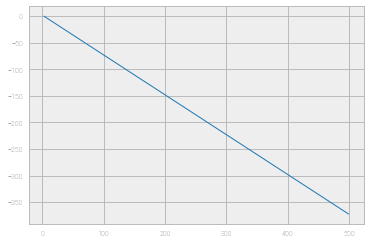

In [5]:
plt.plot(x, +((2**(-2))*8)-((1-(2**(-2)))*x))

In [ ]:
plot